# Prática independente - SQL Básico II.

Importando bibliotecas

In [38]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

Tamanho padrão das figuras neste notebook

In [46]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

Conectando à base de dados

In [7]:
db = sqlite3.connect('database.db')

Consultando tabelas presentes na base de dados utilizada

In [5]:
res = conn.execute("SELECT name FROM sqlite_master WHERE type = 'table';")

for name in res:
    print (name[0])

customers
employees
offices
orderdetails
orders
payments
productlines
products


#### Exercício 1 - Lista funcionários por chefe.
```SQL
JUNTE E COMBINE TODOS AS LINHAS DAS TABELAS
   employees e1,
   employees e2

PEGUE SÓ LINHAS QUE OBEDEÇAM AO CRITÉRIO
   e1.reportsTo = e2.employeeNumber

MOSTRE AS COLUNAS
   e2.firstName||' '||e2.lastName AS boss,
   e2.jobTitle                    AS department,
   e1.employeeNumber              AS ID,
   e1.firstName||' '||e1.lastName AS employee

ORDENE POR
   boss
```

In [14]:
query = """SELECT e2.firstName||' '||e2.firstName AS boss,
                  e2.jobTitle AS department,
                  e1.employeeNUmber AS ID,
                  e1.firstName||' '||e1.lastName AS employeeName

          FROM
          employees AS e1, employees AS e2

          WHERE
          e1.reportsTo = e2.employeeNumber

          ORDER BY
          boss
;"""

queryResult = pd.read_sql_query(query, db)

queryResult.head(7)

,boss,department,ID,employeeName
0,Anthony Anthony,Sales Manager (NA),1165,Leslie Jennings
1,Anthony Anthony,Sales Manager (NA),1166,Leslie Thompson
2,Anthony Anthony,Sales Manager (NA),1188,Julie Firrelli
3,Anthony Anthony,Sales Manager (NA),1216,Steve Patterson
4,Anthony Anthony,Sales Manager (NA),1286,Foon Yue Tseng
5,Anthony Anthony,Sales Manager (NA),1323,George Vanauf
6,Diane Diane,President,1056,Mary Patterson


#### Exercício 2 - Inspeciona pedidos de compra.

Dados sobre pedidos aparecem nas tabelas `orders` e `orderdetails` e o que relaciona elas é a coluna `orderNumber`. Vamos inspecionar um único pedido.

```SQL
JUNTE E COMBINE TODOS AS LINHAS DAS TABELAS
   orderdetails

PEGUE SÓ LINHAS QUE OBEDEÇAM AO CRITÉRIO
   orderNumber=10103

MOSTRE AS COLUNAS
    orderLineNumber,
    productCode,
    priceEach,
    quantityOrdered,
    priceEach*quantityOrdered as priceTotal
    
ORDENE POR
   orderLineNumber
```

In [27]:
query = """SELECT *,
                  (od.priceEach * od.quantityOrdered) AS totalPrice

          FROM
          orderDetails AS od

          WHERE
          od.orderNUmber = 10103

          ORDER BY
          od.orderLineNumber
;"""

queryResult = pd.read_sql_query(query, db)

queryResult.head()

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber,totalPrice
0,10103,S24_2300,36,107.34,1,3864.24
1,10103,S18_2432,22,58.34,2,1283.48
2,10103,S32_1268,31,92.46,3,2866.26
3,10103,S10_4962,42,119.67,4,5026.14
4,10103,S18_4600,36,98.07,5,3530.52


#### Exercício 3 - Vamos melhorar a leitura dessa tabela adicionando a descrição do produto. Faremos um **JOIN** com a tabela `products`.

```SQL
JUNTE E COMBINE TODOS AS LINHAS DAS TABELAS
   orderdetails AS o,
   products AS p

PEGUE SÓ LINHAS QUE OBEDEÇAM AO CRITÉRIO
    o.productCode=p.productCode AND
    orderNumber=10103

MOSTRE AS COLUNAS
    o.orderLineNumber,
    o.priceEach,
    o.quantityOrdered,
    o.priceEach*o.quantityOrdered as itemTotal,
    o.productCode,
    p.productName
    
ORDENE POR
   orderLineNumber
```

In [25]:
query = """SELECT o.orderLineNumber,
                  o.productCode,
                  p.productName,
                  o.priceEach,
                  o.quantityOrdered,
                  (o.priceEach * o.quantityOrdered) AS totalPrice

          FROM
          orderDetails AS o, products AS p

          WHERE 
          p.productCode = o.productCode AND
          o.orderNumber = 10103

          ORDER BY
          o.orderLineNumber
;"""

queryResult = pd.read_sql_query(query, db)

queryResult.head()

,orderLineNumber,productCode,productName,priceEach,quantityOrdered,totalPrice
0,1,S24_2300,1962 Volkswagen Microbus,107.34,36,3864.24
1,2,S18_2432,1926 Ford Fire Engine,58.34,22,1283.48
2,3,S32_1268,1980’s GM Manhattan Express,92.46,31,2866.26
3,4,S10_4962,1962 LanciaA Delta 16V,119.67,42,5026.14
4,5,S18_4600,1940s Ford truck,98.07,36,3530.52


#### Exercício 4 - Performance de venda por categoria de produtos

```SQL
JUNTE E COMBINE TODOS AS LINHAS DAS TABELAS
    orderdetails o,
    products p

PEGUE SÓ LINHAS QUE OBEDEÇAM AO CRITÉRIO
    o.productCode=p.productCode

MOSTRE AS COLUNAS
    p.productLine,
    count(p.productLine) AS nItems,
    sum(o.priceEach*o.quantityOrdered)/count(p.productLine) AS averagePerItem,
    sum(o.priceEach*o.quantityOrdered) AS lineTotal

AGRUPE POR
    p.productLine

ORDENE INVERSAMENTE POR
   lineTotal
```

In [42]:
query = """SELECT p.productLine,
                  COUNT(p.productLine) AS nItems,
                  SUM(o.priceEach * o.quantityOrdered) / COUNT(p.productLine) AS averagePerItem,
                  SUM(o.priceEach * o.quantityOrdered) AS totalLine

          FROM
          orderDetails AS o, products AS p

          WHERE 
          p.productCode = o.productCode

          GROUP BY
          p.productLine

          ORDER BY
          totalLine DESC
;"""

queryResult = pd.read_sql_query(query, db)

queryResult.head()

,productLine,nItems,averagePerItem,totalLine
0,Classic Cars,1010,3815.764842,3853922.49
1,Vintage Cars,657,2736.011613,1797559.63
2,Motorcycles,359,3123.749638,1121426.12
3,Trucks and Buses,308,3325.044058,1024113.57
4,Planes,336,2841.183155,954637.54


In [43]:
categorias_produtos_mais_arrecadaram = queryResult.head()

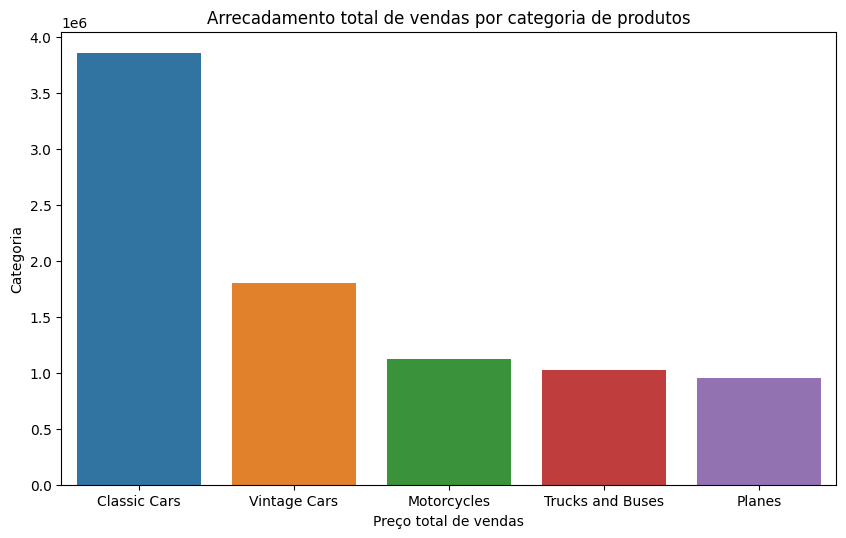

In [51]:
# Gráfico de barras
categorias_que_mais_arrecadaram = sns.barplot(x= categorias_produtos_mais_arrecadaram['productLine'], 
                                            y= categorias_produtos_mais_arrecadaram['totalLine'])

#Título
categorias_que_mais_arrecadaram.set_title('Arrecadamento total de vendas por categoria de produtos')

#Legenda eixo x
categorias_que_mais_arrecadaram.set_xlabel('Preço total de vendas')

#Legenda eixo y
categorias_que_mais_arrecadaram.set_ylabel('Categoria');

#### Exercício 5 - Qual é o produto que mais vende ?

```SQL
JUNTE E COMBINE TODOS AS LINHAS DAS TABELAS
    orderdetails o,
    products p

PEGUE SÓ LINHAS QUE OBEDEÇAM AO CRITÉRIO
    o.productCode=p.productCode

MOSTRE AS COLUNAS
    p.productName,
    count(o.quantityOrdered) AS nItems,
#    sum(o.priceEach*o.quantityOrdered) AS lineTotal

AGRUPE POR
    p.productCode

ORDENE INVERSAMENTE POR
   lineTotal
```

In [54]:
query = """SELECT p.productName,
                  COUNT(o.quantityOrdered) AS nItems,
                  SUM(o.priceEach * o.quantityOrdered) AS totalLine

          FROM
          orderDetails AS o, products AS p

          WHERE 
          p.productCode = o.productCode

          GROUP BY
          p.productCode

          ORDER BY
          nItems DESC
;"""

queryResult = pd.read_sql_query(query, db)

queryResult.head()

,productName,nItems,totalLine
0,1992 Ferrari 360 Spider red,53,276839.98
1,1969 Harley Davidson Ultimate Chopper,28,90157.77
2,1952 Alpine Renault 1300,28,190017.96
3,1996 Moto Guzzi 1100i,28,109998.82
4,2003 Harley-Davidson Eagle Drag Bike,28,170686.00


Cinco produtos com mais unidades vendidas

In [55]:
produtos_com_mais_unidades_vendidas = queryResult.head()

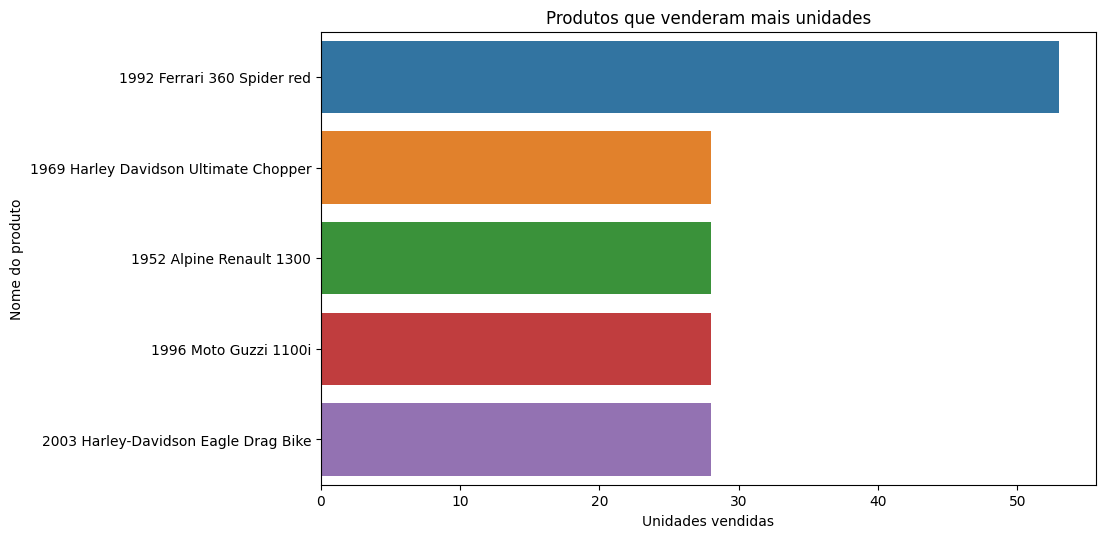

In [58]:
#Gráfico de barras
mais_unidades_vendidas = sns.barplot(x= produtos_com_mais_unidades_vendidas['nItems'], 
                                     y= produtos_com_mais_unidades_vendidas['productName'])

#Título
mais_unidades_vendidas.set_title('Produtos que venderam mais unidades')

#Legenda eixo x
mais_unidades_vendidas.set_xlabel('Unidades vendidas')

#Legenda eixo y
mais_unidades_vendidas.set_ylabel('Nome do produto');

#### Exercício 6 - Qual é o cliente que mais compra ?

```SQL
JUNTE E COMBINE TODOS AS LINHAS DAS TABELAS
    orderdetails as od,
    orders as o,
    customers as c

PEGUE SÓ LINHAS QUE OBEDEÇAM AO CRITÉRIO
    od.orderNumber = o.orderNumber AND
    c.customerNumber = o.customerNumber

MOSTRE AS COLUNAS
    c.customerNumber,
    c.customerName,
    sum(od.priceEach*od.quantityOrdered) AS customerTotal
    sum(od.quantityOrdered) AS nItems,

AGRUPE POR
    c.customerNumber

ORDENE INVERSAMENTE POR
   customerTotal
```

In [59]:
query = """SELECT c.customerNumber,
                  c.customerName,
                  SUM(od.priceEach * od.quantityOrdered) AS totalCustomer,
                  SUM(od.quantityOrdered) AS nItems
                  

          FROM
          orderDetails AS od, orders AS o, customers AS c

          WHERE 
          od.orderNumber = o.orderNumber AND
          c.customerNumber = o.customerNumber

          GROUP BY
          c.customerNumber

          ORDER BY
          totalCustomer DESC
;"""

queryResult = pd.read_sql_query(query, db)

queryResult.head()

,customerNumber,customerName,totalCustomer,nItems
0,141,Euro+ Shopping Channel,820689.54,9327
1,124,Mini Gifts Distributors Ltd.,591827.34,6366
2,114,"Australian Collectors, Co.",180585.07,1926
3,151,Muscle Machine Inc,177913.95,1775
4,119,La Rochelle Gifts,158573.12,1832


Cinco clientes que mais compram

In [61]:
clientes_que_mais_compraram = queryResult.head()

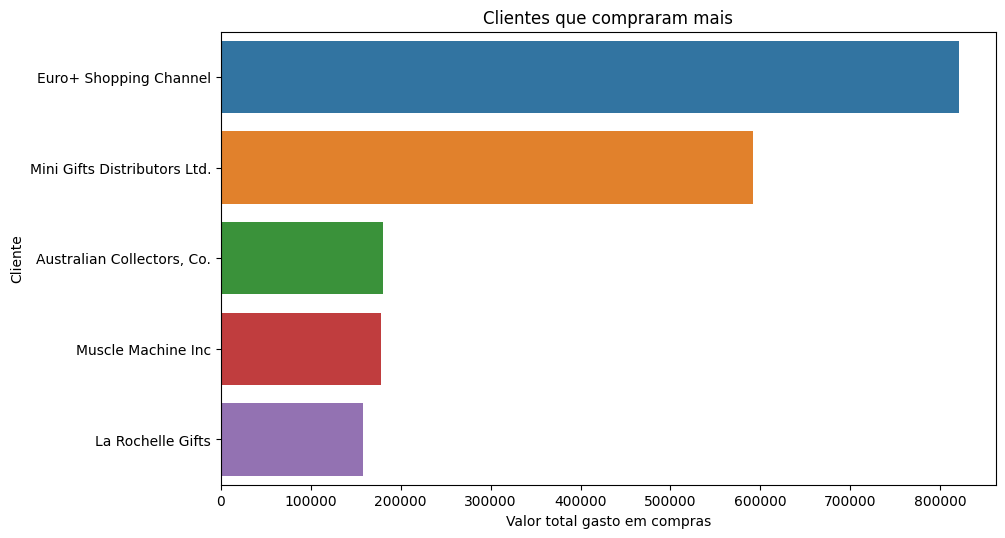

In [62]:
#Gráfico de barras
clientes_mais_compraram = sns.barplot(x= clientes_que_mais_compraram['totalCustomer'], 
                                     y= clientes_que_mais_compraram['customerName'])

#Título
clientes_mais_compraram.set_title('Clientes que compraram mais')

#Legenda eixo x
clientes_mais_compraram.set_xlabel('Valor total gasto em compras')

#Legenda eixo y
clientes_mais_compraram.set_ylabel('Cliente');

#### Exercício 7 - Mostre vendas e valores por mês...

```SQL
JUNTE E COMBINE TODOS AS LINHAS DAS TABELAS
    orderdetails as od,
    orders as o,

PEGUE SÓ LINHAS QUE OBEDEÇAM AO CRITÉRIO
    od.orderNumber = o.orderNumber

MOSTRE AS COLUNAS
    substr(o.orderDate,1,7) as month,
    sum(od.priceEach*od.quantityOrdered) AS monthTotal
    sum(od.quantityOrdered) AS nItems,

AGRUPE POR
    month

ORDENE INVERSAMENTE POR
   month
```

In [91]:
query = """SELECT SUBSTR(o.orderDate, 1, 7) AS month,
                  SUM(od.priceEach * od.quantityOrdered) AS totalPerMonth,
                  SUM(od.quantityOrdered) AS nItems
                  

          FROM
          orderDetails AS od, orders AS o

          WHERE 
          od.orderNumber = o.orderNumber

          GROUP BY
          month

          ORDER BY
          month DESC
;"""

queryResult = pd.read_sql_query(query, db)

queryResult.head()

,month,totalPerMonth,nItems
0,2005-05,441474.94,4759
1,2005-04,344820.62,3836
2,2005-03,359711.96,4207
3,2005-02,317192.17,3393
4,2005-01,307737.02,3395


In [93]:
vendas_ano_e_mes = queryResult

Analisando as vendas por anos e meses

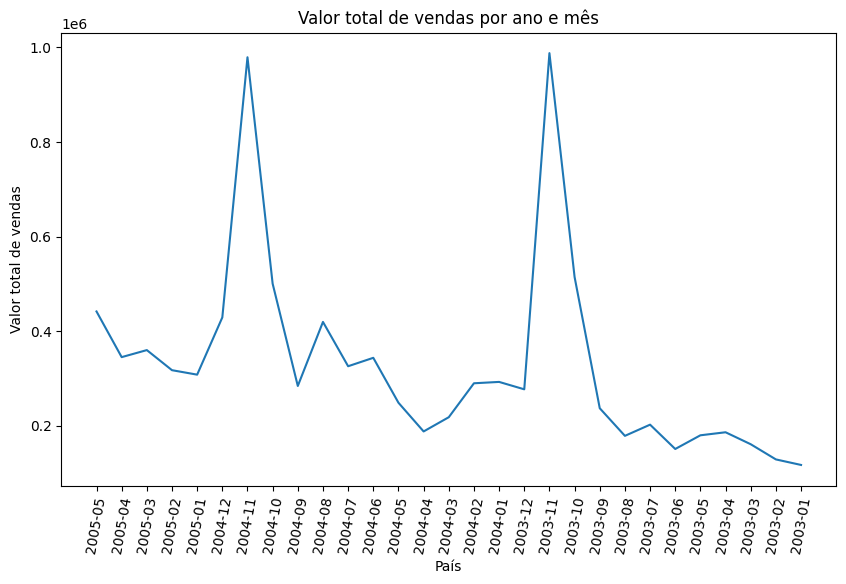

In [97]:
# Gráfico de barras
vendas_totais_por_ano_e_mes = sns.lineplot(data= vendas_ano_e_mes, x= 'month', y= 'totalPerMonth')

#Título
vendas_totais_por_ano_e_mes.set_title('Valor total de vendas por ano e mês')

#Legenda eixo x
vendas_totais_por_ano_e_mes.set_xlabel('País')

#Legenda eixo y
vendas_totais_por_ano_e_mes.set_ylabel('Valor total de vendas')

# Rotacionando nome dos países no eixo x
vendas_totais_por_ano_e_mes.set_xticklabels(labels= vendas_ano_e_mes['month'], rotation= 80);

Hipótese:

Temos os dois picos situados nos meses de Novembro de 2003 e 2004 (não temos informações desse mês em outros anos pra confirmarmos a lógica). O fato dos picos de vendas estarem situados em Novembro pode estar relacionado a este ser o mês que tradicionalmente é realizada a Black Friday (produtos são vendidos com preços teoricamente mais baratos). Temos uma queda  de vendas em Dezembro, o que pode indicar que as pessoas aproveitam os preços mais baratos pra comprar os presentes de Natal/Ano Novo antecipadamente na Black Friday.

Em quais meses de quais anos as vendas foram maiores?

In [63]:
query = """SELECT SUBSTR(o.orderDate, 1, 7) AS month,
                  SUM(od.priceEach * od.quantityOrdered) AS totalPerMonth,
                  SUM(od.quantityOrdered) AS nItems
                  

          FROM
          orderDetails AS od, orders AS o

          WHERE 
          od.orderNumber = o.orderNumber

          GROUP BY
          month

          ORDER BY
          totalPerMonth DESC
;"""

queryResult = pd.read_sql_query(query, db)

queryResult.head()

,month,totalPerMonth,nItems
0,2003-11,988025.15,10862
1,2004-11,979291.98,10678
2,2003-10,514336.21,5731
3,2004-10,500233.86,5483
4,2005-05,441474.94,4759


Cinco maiores vendas por meses e anos

In [64]:
anos_e_meses_que_mais_venderam = queryResult.head()

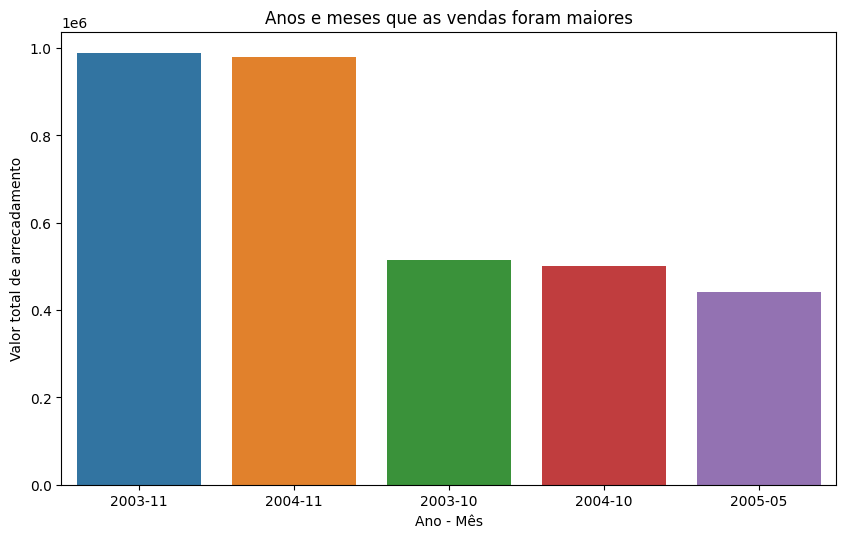

In [65]:
#Gráfico de barras
anos_e_meses_mais_vendas = sns.barplot(x= anos_e_meses_que_mais_venderam['month'], 
                                     y= anos_e_meses_que_mais_venderam['totalPerMonth'])

#Título
anos_e_meses_mais_vendas.set_title('Anos e meses que as vendas foram maiores')

#Legenda eixo x
anos_e_meses_mais_vendas.set_xlabel('Ano - Mês')

#Legenda eixo y
anos_e_meses_mais_vendas.set_ylabel('Valor total de arrecadamento');